In [0]:
import csv
import pandas as pd
import nltk
import re
import collections
import matplotlib.pyplot as plt
import seaborn as sns

# Questão 1

In [72]:
colecao = pd.read_csv('results.csv')
colecao = colecao[['texto']]
colecao = colecao.astype(str).values.tolist()

total_documentos = 0
palavras = []
vocabulario = []

def palavrasComMaisDe1000Ocorrencias(freq_ocorrencias):
  cont_ocorrencias = 0
  for i in freq_ocorrencias.values():
    if i >= 1000:
      cont_ocorrencias += 1
  return cont_ocorrencias

def palavrasComUmaOcorrencia(freq_ocorrencias):
  cont_ocorrencias = 0
  for i in freq_ocorrencias.values():
    if i == 1:
      cont_ocorrencias += 1
  return cont_ocorrencias

for i in colecao:
  total_documentos += 1
  for j in i[0].split():
    palavras.append(j)
    if j not in vocabulario:
      vocabulario.append(j)

freq_ocorrencias = collections.Counter(palavras)
total_palavras = len(palavras)
tamanho_vocabulario = len(vocabulario)
palavras_1000_ocorrencias = palavrasComMaisDe1000Ocorrencias(freq_ocorrencias)
palavras_uma_ocorrencia = palavrasComUmaOcorrencia(freq_ocorrencias)

tabela_q1 = pd.DataFrame(data = {'Informações': ['Total de documentos:', 'Total de ocorrencias de palavras:','Tamanho do vocabulario:', 
                                  'Numero de palavras com mais de 1000 ocorrencias:', 'Numero de palavras com uma ocorrencia:'],
                                  'Quantidade': [total_documentos, total_palavras, tamanho_vocabulario, palavras_1000_ocorrencias, palavras_uma_ocorrencia]})
tabela_q1

,Informações,Quantidade
0,Total de documentos:,278
1,Total de ocorrencias de palavras:,148593
2,Tamanho do vocabulario:,26480
3,Numero de palavras com mais de 1000 ocorrencias:,17
4,Numero de palavras com uma ocorrencia:,16212


# Questão 2

In [73]:
rank50 = sorted(freq_ocorrencias.items(), key=lambda x: x[1], reverse=True)
ranking = 1

tabela_q2 = pd.DataFrame(columns=['Palavra', 'Frequencia', 'r', 'Pr(%)', 'r.Pr'])
tabela_q2['Palavra'] = [palavra[0] for palavra in rank50]
tabela_q2['Frequencia'] = [palavra[1] for palavra in rank50]
tabela_q2['r'] = [r+1 for r in range(0, len(rank50))]
tabela_q2['Pr(%)'] = [round((palavra[1] / total_palavras)*100, 2) for palavra in rank50]
tabela_q2['r.Pr'] = round((tabela_q2['Pr(%)']/100)*tabela_q2['r'], 3)

tabela_q2.head(50)

,Palavra,Frequencia,r,Pr(%),r.Pr
0,de,6991,1,4.70,0.047
1,a,4665,2,3.14,0.063
2,o,4028,3,2.71,0.081
3,que,3816,4,2.57,0.103
4,e,3417,5,2.30,0.115
5,do,2860,6,1.92,0.115
6,da,2411,7,1.62,0.113
7,em,1827,8,1.23,0.098
8,para,1546,9,1.04,0.094
9,um,1530,10,1.03,0.103


# Questão 3

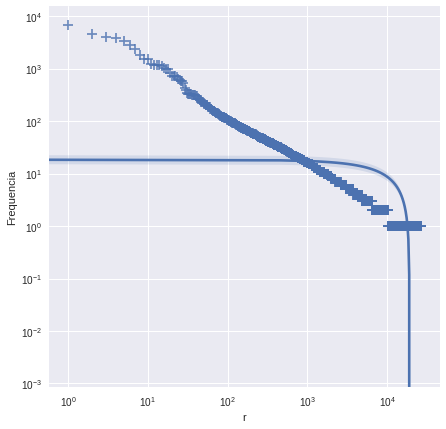

In [74]:
f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")
sns.regplot("r", "Frequencia", tabela_q2, ax=ax, marker="+", scatter_kws={"s": 100})

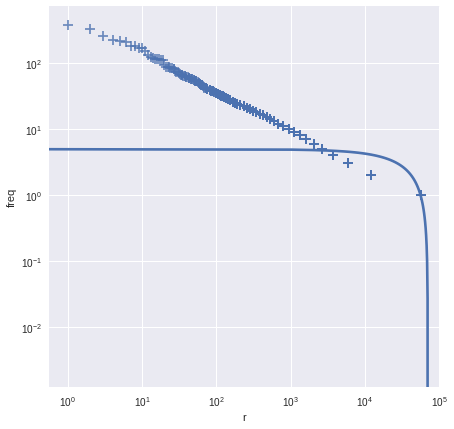

In [75]:
bigrams = []
bigrams = nltk.bigrams(palavras)
frequencia_bigrams = nltk.FreqDist(bigrams)

dados_q3 = pd.DataFrame(frequencia_bigrams.most_common(), columns=['word', 'freq'])
dados_q3['r'] = dados_q3['freq'].rank(ascending=False)

f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")
sns.regplot("r", "freq", dados_q3, ax=ax, marker="+", scatter_kws={"s": 100})

# Questão 4

In [76]:
indices = []
ocorrencias = 0

for i in range(1,11):
    for j in freq_ocorrencias.items():
        if i == j[1]:
            ocorrencias += 1
    tupla_n = (i, ocorrencias)
    indices.append(tupla_n)
    ocorrencias = 0

tabela_q4 = pd.DataFrame(indices, columns = ['Numero de Ocorrencias (n)', 'Numero Real de Palavras'])
tabela_q4['Proporcao Prevista (1/n(n+1))'] = (1 / (tabela_q4['Numero de Ocorrencias (n)']*(tabela_q4['Numero de Ocorrencias (n)'] + 1)))
tabela_q4['Proporcao Real'] = (tabela_q4['Numero Real de Palavras'] / total_palavras)
tabela_q4

,Numero de Ocorrencias (n),Numero Real de Palavras,Proporcao Prevista (1/n(n+1)),Proporcao Real
0,1,16212,0.500000,0.109103
1,2,3776,0.166667,0.025412
2,3,1717,0.083333,0.011555
3,4,990,0.050000,0.006662
4,5,695,0.033333,0.004677
5,6,486,0.023810,0.003271
6,7,354,0.017857,0.002382
7,8,245,0.013889,0.001649
8,9,213,0.011111,0.001433
9,10,186,0.009091,0.001252
